## Customer segmentation based on Salary and Spending Score using K-Means Clustering

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Importing the dataset using pandas
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:,[3,4]].values

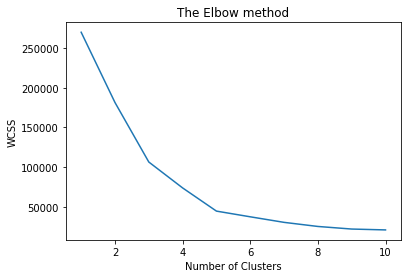

In [3]:
#Using elbow method to compute optimal numberof clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

### From the results obtained from elbow method we can conclude that the optimal number of clusters for this problem would be 5

In [4]:
#Building KNN model for n_cluster=5
kmeans = KMeans(n_clusters=5,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

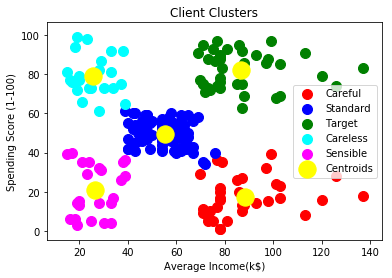

In [5]:
#Visualizing the clusters and their centroids
plt.scatter(X[y_kmeans ==0,0],X[y_kmeans ==0,1],s =100,c="red",label="Careful")
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans ==1,1],s =100,c="blue",label="Standard")
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans ==2,1],s =100,c="green",label="Target")
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans ==3,1],s =100,c="cyan",label="Careless")
plt.scatter(X[y_kmeans ==4,0],X[y_kmeans ==4,1],s =100,c="magenta",label="Sensible") 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c ="yellow", label ="Centroids")
plt.title('Client Clusters')
plt.xlabel('Average Income(k$)')
plt.ylabel("Spending Score (1-100)")
plt.legend(loc=0)
plt.show()